In [1]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Deep Learning #
# Name of dataset: HOUSE Dataset is attached to this .zip file
# Type of dataset: the dataset type is regression
# Method: 
    # Sequential model in Keras, which is a linear stack of three fully connected (Dense) layers suitable for a feedforward neural network 

In [2]:
################## Step 1: Import all the required Libraries ##################

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

In [3]:
################ Step 2: Reading (or Loading) the dataset: #################

data = pd.read_csv('house.csv')

In [4]:
################# Step 3: Inspect Data Types: #################
# Load the CSV file into a pandas DataFrame
try:
    data = pd.read_csv('house.csv')

    # Get the shape of the DataFrame
    # The .shape attribute returns a tuple (number_of_rows, number_of_columns)
    data_shape = data.shape

    # Print the shape
    print(f"The shape of car.csv is: {data_shape}")
    print(f"Number of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    
    # Using .dtypes for a Series showing only data types
    print(f"\nType of data is:\n{data.dtypes}")
    
except FileNotFoundError:
    print("Error: 'car.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

The shape of car.csv is: (3479, 8)
Number of rows: 3479
Number of columns: 8

Type of data is:
Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [5]:
################# Step 3: Inspect Data Types: #################

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [6]:
################# Step 3: Inspect Data Types: #################

# To get a list of all column names (features):

data.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [7]:
################# Step 3: Inspect Data Types: #################

results = pd.DataFrame(data)
results

Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.025000e+08    30083.33  
4     7.000000e+09   233333.33  
...            ...         ...  
3474  3.500000e+09   116666.67  
3475  6.800000e+09   226666.67  
3476  3.650000e+08    12166.67  
3477  5.600000e+09   186666.67  
3478  3.600000e+08    12000.00  

[3479 rows x 8 columns]

In [8]:
################# Step 3: Inspect Data Types: #################

# Accessing Data Types of Columns:
# To see the data type (Dtype) of each column:

data.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [9]:
################# Step 3: Inspect Data Types: #################

# Accessing a Specific Column (Feature):
# You can access a single column using bracket notation or dot notation (if the column name is a valid Python identifier and doesn't conflict with DataFrame methods):

# Using bracket notation
data['Area']

print("\n")
# Using dot notation
data.Room

0       1
1       1
2       2
3       2
4       2
       ..
3474    2
3475    2
3476    2
3477    2
3478    2
Name: Room, Length: 3479, dtype: int64

In [10]:
################# Step 3: Inspect Data Types: #################

# Access the 'Area' column as a pandas Series
areas = data.Area
areas

0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3479, dtype: object

In [11]:
################# Step 3: Inspect Data Types: #################

# Access the 'Room' column
rooms = data.Room
rooms

0       1
1       1
2       2
3       2
4       2
       ..
3474    2
3475    2
3476    2
3477    2
3478    2
Name: Room, Length: 3479, dtype: int64

In [12]:
################# Step 3: Inspect Data Types: #################

# Access the 'Parking' column as a pandas Series
parking = data.Parking
parking

0        True
1        True
2        True
3        True
4        True
        ...  
3474     True
3475     True
3476    False
3477     True
3478    False
Name: Parking, Length: 3479, dtype: bool

In [13]:
################# Step 3: Inspect Data Types: #################

# Access the 'Warehouse' column as a pandas Series
warehouses = data.Warehouse
warehouses

0        True
1        True
2        True
3        True
4        True
        ...  
3474     True
3475     True
3476    False
3477     True
3478     True
Name: Warehouse, Length: 3479, dtype: bool

In [14]:
################# Step 3: Inspect Data Types: #################

# Access the 'Elevator' column as a pandas Series
elevators = data.Elevator
elevators

0        True
1        True
2        True
3        True
4        True
        ...  
3474     True
3475     True
3476    False
3477     True
3478     True
Name: Elevator, Length: 3479, dtype: bool

In [15]:
################# Step 3: Inspect Data Types: #################

# Access the 'Address' column
addresses = data.Address
addresses

0                  Shahran
1                  Shahran
2                   Pardis
3            Shahrake Qods
4           Shahrake Gharb
               ...        
3474    Southern Janatabad
3475              Niavaran
3476                Parand
3477                Dorous
3478                Parand
Name: Address, Length: 3479, dtype: object

In [16]:
################# Step 3: Inspect Data Types: #################

# Access the 'Price' column
prices = data.Price
prices

0       1.850000e+09
1       1.850000e+09
2       5.500000e+08
3       9.025000e+08
4       7.000000e+09
            ...     
3474    3.500000e+09
3475    6.800000e+09
3476    3.650000e+08
3477    5.600000e+09
3478    3.600000e+08
Name: Price, Length: 3479, dtype: float64

In [ ]:
################# Step 3: Inspect Data Types: #################

# To confirm that the given dataset (House Dataset) is of regression type

data['Price'].unique() 

array([1.85000000e+09, 5.50000000e+08, 9.02500000e+08, 7.00000000e+09,
       2.05000000e+09, 6.00000000e+08, 2.15000000e+09, 4.93000000e+08,
       2.37000000e+09, 2.45000000e+09, 2.10000000e+09, 1.69000000e+09,
       1.10000000e+10, 5.00000000e+09, 5.70000000e+08, 6.70000000e+09,
       1.45000000e+09, 6.40000000e+09, 1.39000000e+09, 2.50000000e+09,
       1.88000000e+09, 2.27700000e+09, 7.15000000e+09, 1.49450000e+10,
       1.77100000e+09, 4.05900000e+09, 6.30000000e+08, 3.20000000e+09,
       1.50000000e+09, 2.20000000e+09, 7.87200000e+09, 2.35000000e+09,
       3.75000000e+09, 5.25000000e+09, 4.83000000e+09, 3.40000000e+09,
       3.85000000e+09, 1.20000000e+09, 2.65000000e+09, 4.75000000e+09,
       2.98000000e+09, 2.03500000e+09, 2.46000000e+09, 5.40000000e+08,
       1.00000000e+10, 6.35000000e+08, 2.03000000e+09, 3.00000000e+09,
       7.20000000e+09, 1.75000000e+09, 3.30000000e+09, 2.80000000e+09,
       3.50000000e+09, 3.10000000e+09, 1.92000000e+09, 8.50000000e+08,
      

In [18]:
################# Step 3: Inspect Data Types: #################
# By Position (using iloc): The iloc accessor allows selection by integer position. This is useful when the index labels are not consecutive or are not integers.

# Access the row at index 0 (the first row)
first_row = data.iloc[0]
print(f"The values for the first row are: \n{first_row}")
first_row

The values for the first row are: 
Area                    63
Room                     1
Parking               True
Warehouse             True
Elevator              True
Address            Shahran
Price         1850000000.0
Price(USD)        61666.67
Name: 0, dtype: object


Area                    63
Room                     1
Parking               True
Warehouse             True
Elevator              True
Address            Shahran
Price         1850000000.0
Price(USD)        61666.67
Name: 0, dtype: object

In [19]:
################# Step 3: Inspect Data Types: #################
# By Position (using iloc): The iloc accessor allows selection by integer position. This is useful when the index labels are not consecutive or are not integers.

# Access a range of rows (from index 0 up to, but not including, index 5)
first_five_rows = data.iloc[0:5]
print(f"\nThe values for the first five rows are:\n{first_five_rows}")
first_five_rows


The values for the first five rows are:
  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33

In [110]:
################# Step 3: Inspect Data Types: #################

# Accessing Rows:
# By Label (using loc): 
# The loc accessor allows selection by label. You can select single rows, multiple rows using a list of labels, or a range of rows using slicing with labels.

first_six_rows = data.loc[[0, 5]]    # Accesses rows with index labels 0 and 5
first_six_rows

Area  Room  Parking  Warehouse  Elevator                     Address  \
0   63     1     True       True      True                     Shahran   
5   70     2     True       True     False  North Program Organization   

          Price  Price(USD)  
0  1.850000e+09    61666.67  
5  2.050000e+09    68333.33

In [111]:
################# Step 3: Inspect Data Types: #################

# Accessing Specific Cells:
# By Label (using loc): Combine row and column labels.

data.loc[0, 'Price'] 
# Accesses the 'Price' value in the row with index label 0

np.float64(1850000000.0)

In [112]:
################# Step 3: Inspect Data Types: #################

# Fast Position-based Access (using iat): For single-cell access by integer position, iat is generally faster than iloc.

data.iat[0, 6]       
# Accesses the value in the first row and seventh column (Price)

np.float64(1850000000.0)

In [113]:
################# Step 3: Inspect Data Types: #################

# Conditional Selection (Boolean Indexing):
## You can select rows based on conditions applied to column values.

data[data['Room'] > 2] # Selects all rows where the 'Room' count is greater than 2

Area  Room  Parking  Warehouse  Elevator                 Address  \
13    136     3     True       True      True             Saadat Abad   
16    155     3     True       True      True                  Narmak   
18    140     3     True       True      True  West Ferdows Boulevard   
25    160     3     True       True      True                Velenjak   
44    130     3     True       True     False                ShahrAra   
...   ...   ...      ...        ...       ...                     ...   
3453  180     3     True       True     False               Marzdaran   
3457  123     3     True       True      True                Velenjak   
3458  148     3     True       True      True               Daryan No   
3463  133     3     True      False      True          Shahrake Gharb   
3472  113     3     True       True      True             Ostad Moein   

             Price  Price(USD)  
13    1.100000e+10   366666.67  
16    6.700000e+09   223333.33  
18    6.400000e+09   213333.33  
25    1.494500e+10   498166.67  
44    5.000000e+09   166666.67  
...            ...         ...  
3453  1.080000e+10   360000.00  
3457  1.250000e+10   416666.67  
3458  6.000000e+09   200000.00  
3463  1.000000e+10   333333.33  
3472  3.170000e+09   105666.67  

[835 rows x 8 columns]

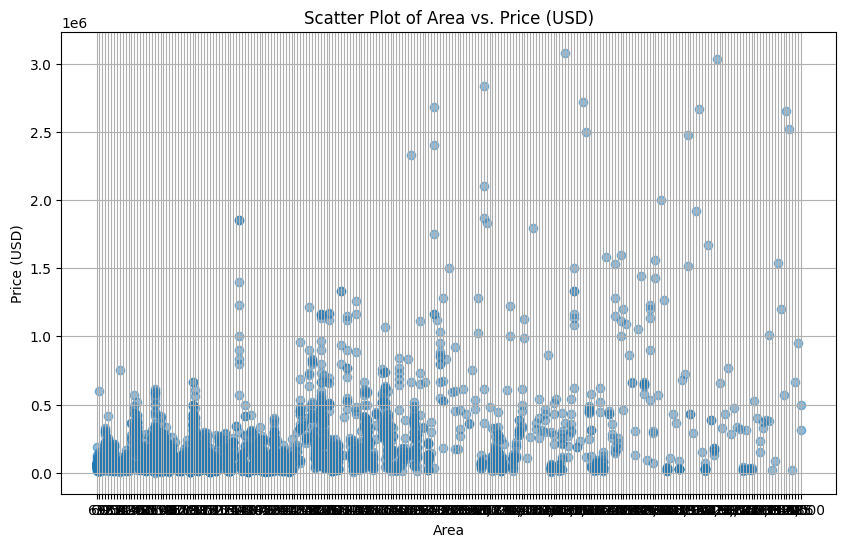

In [114]:
################# Step 3: Inspect Data Types: #################

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# This example plots the Area (assuming it has been converted to a numerical value, e.g., square footage) against the Price(USD). 
# Note: The provided Area column has an object Dtype, so you may need to convert it to numeric values first if it represents square footage or similar values. 
# Assuming your Area column is clean numerical data:
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['Price(USD)'], alpha=0.5)
plt.title('Scatter Plot of Area vs. Price (USD)')
plt.xlabel('Area')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


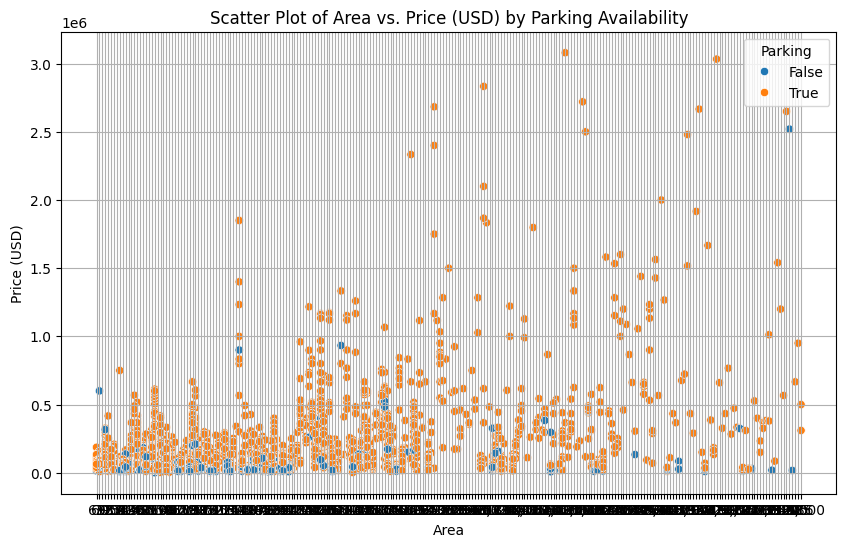

In [115]:
################# Step 3: Inspect Data Types: #################

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame

plt.figure(figsize=(10, 6))
# 'hue="Parking"' colors the points based on whether parking is available
sns.scatterplot(data=data, x='Area', y='Price(USD)', hue='Parking') 
plt.title('Scatter Plot of Area vs. Price (USD) by Parking Availability')
plt.xlabel('Area')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


<Axes: xlabel='Area_Numeric', ylabel='Price(USD)'>

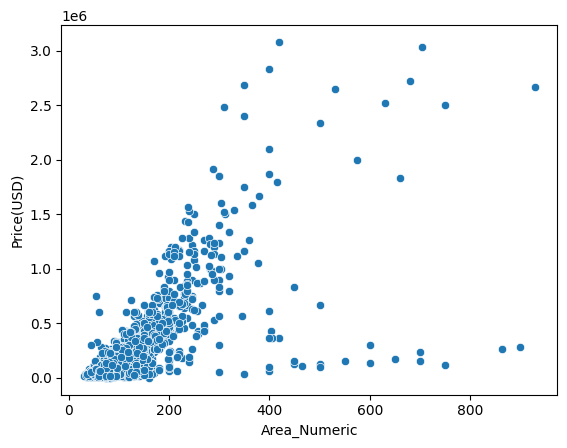

In [116]:
################# Step 3: Inspect Data Types: #################

# Ensure numerical data types: The columns you plot on the X and Y axes must be numerical. Your Area column is currently an object. 
# You might need to clean and convert it:

# Convert Area to numeric, handling potential issues
data['Area_Numeric'] = pd.to_numeric(data['Area'], errors='coerce')

# Drop rows where conversion failed (NaNs created by 'coerce')
data_cleaned = data.dropna(subset=['Area_Numeric']) 

# Then use 'Area_Numeric' in your plotting code
sns.scatterplot(data=data_cleaned, x='Area_Numeric', y='Price(USD)')


In [117]:
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.

# Load the CSV file into a pandas DataFrame
try:
    data = pd.read_csv('house.csv')

    # Get the shape of the DataFrame
    # The .shape attribute returns a tuple (number_of_rows, number_of_columns)
    data_shape = data.shape

    # Print the shape
    print(f"The shape of car.csv is:\n {data_shape}")
    print(f"\nNumber of rows: {data_shape[0]}")
    print(f"\nNumber of columns: {data_shape[1]}")
    
    # Using .dtypes for a Series showing only data types
    print(f"\nType of data is:\n{data.dtypes}")
    
except FileNotFoundError:
    print("Error: 'car.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

The shape of car.csv is:
 (3479, 8)

Number of rows: 3479

Number of columns: 8

Type of data is:
Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [118]:
################# Step 4: Data cleaning and preprocessing: #################
#### Preprocess the Data:
#### First, we will preprocess the dataset to:
# 1. Handle missing values.
# 2. Convert categorical variables (e.g., Area, Address) into numerical values.
# 3. Normalize the numerical features (Room, Parking, etc.) for better training performance.
# 4. Prepare the target variable (Price) for training.

In [30]:
################# Step 4: Data cleaning and preprocessing: #################

data.isna().sum() # Count missing values per column

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [119]:
################# Step 4: Data cleaning and preprocessing: #################

# Both methods are used for data transformation, but they serve different purposes and are applied to different types of data.
# 1. LabelEncoder()
# 2. pd.to_numeric()

# 1. LabelEncoder (LabelEncoder().fit_transform())
#### from sklearn.preprocessing import LabelEncoder
#### l = LabelEncoder()
#### data['Address'] = l.fit_transform(data['Address'])

# LabelEncoder() is used to encode categorical labels (i.e., non-numeric data) as numeric labels.
# It converts categories (strings or non-numeric values) into a numeric representation that can be used in machine learning models (which usually require numerical input). 
# It does not handle missing values (NaN). If your column has NaNs, you need to handle them before applying LabelEncoder.
# The resulting numbers are not necessarily meaningful; they are just arbitrary labels.
# Categorical Data: You typically use LabelEncoder for ordinal or nominal categorical data (i.e., non-numeric, but with distinct categories).


# pd.to_numeric() is used to convert data to numeric types (integers or floats), typically applied to columns with numeric data stored as strings or other formats.
# This function converts the entire column to a numeric type, and any values that cannot be converted to a number will be replaced with NaN if errors='coerce' is used.
# Numeric Data: It's used when the data should be numeric but might be stored as strings or mixed types (e.g., numbers with symbols, commas, or letters).
# If any values are not valid numbers (like strings or other types), they will be converted to NaN.
# The result is a clean numeric column (of type int or float), which is useful for mathematical operations or machine learning models that require numeric input.

In [120]:
################# Step 4: Data cleaning and preprocessing: #################
from sklearn.preprocessing import LabelEncoder

# Replace 'Area' and 'Address' categorical columns with numeric labels
# Label encode the 'Area' and 'Address' columns if they are categorical
label_encoder_area = LabelEncoder()
label_encoder_address = LabelEncoder()

data['Area'] = label_encoder_area.fit_transform(data['Area'])
data['Address'] = label_encoder_address.fit_transform(data['Address'].fillna('Missing'))  # Handle missing 'Address' entries by filling with 'Missing'


In [121]:
################# Step 4: Data cleaning and preprocessing: #################

# Fill missing values in other columns if necessary, for example using the mean for numerical columns
data['Address'] = data['Address'].fillna('Missing')


In [122]:
################# Step 4: Data cleaning and preprocessing: #################

data.isna().sum() # Count missing values per column

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [123]:
################# Step 4: Data cleaning and preprocessing: #################
# Converting Booleans of True and False into "0" and "1"
# We can also apply "data.replace({True: 1, False: 0}, inplace=True)" to only some columns or how to convert booleans using .astype(int) instead.

# 1. data.replace({...})
## replace() looks through the entire DataFrame and replaces values based on the dictionary you provide.

# 2. {True: 1, False: 0}
## This dictionary tells pandas:
## Replace every True with 1
## Replace every False with 0

# 3. inplace=True
# Make the change directly inside the DataFrame data
# Do not create or return a new DataFrame

# How replace({...}) handles NaN values:
## 1. NaN values stay unchanged:
#### If you have NaN values in your DataFrame, pandas will not attempt to replace them unless you explicitly define NaN in your dictionary.
## 2. Replace only the specified values:
#### In your case, you are replacing True with 1 and False with 0, so the NaN values will remain NaN because they are not part of the replace dictionary.
#### Replace True with 1 and False with 0

data.replace({True: 1, False: 0}, inplace=True)
data

C:\Users\komey\AppData\Local\Temp\ipykernel_6620\2637446804.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({True: 1, False: 0}, inplace=True)


Area  Room  Parking  Warehouse  Elevator  Address         Price  \
0      196     1        1          1         1      157  1.850000e+09   
1      192     1        1          1         1      157  1.850000e+09   
2      219     2        1          1         1      118  5.500000e+08   
3      238     2        1          1         1      153  9.025000e+08   
4       29     2        1          1         1      151  7.000000e+09   
...    ...   ...      ...        ...       ...      ...           ...   
3474   226     2        1          1         1      164  3.500000e+09   
3475   223     2        1          1         1      106  6.800000e+09   
3476   214     2        0          0         0      116  3.650000e+08   
3477    11     2        1          1         1       39  5.600000e+09   
3478   222     2        0          1         1      116  3.600000e+08   

      Price(USD)  
0       61666.67  
1       61666.67  
2       18333.33  
3       30083.33  
4      233333.33  
...          ...  
3474   116666.67  
3475   226666.67  
3476    12166.67  
3477   186666.67  
3478    12000.00  

[3479 rows x 8 columns]

In [124]:
################# Step 4: Data cleaning and preprocessing: #################
# Converting Booleans of True and False into "0" and "1"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3479 non-null   int64  
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 217.6 KB


In [125]:
################# Step 4: Data cleaning and preprocessing: #################

data.drop(columns= 'Price(USD)', inplace=True)
# The command data.drop(columns='price(USD)', inplace=True) in the pandas library removes the column named 'price(USD)' directly from the original DataFrame called data. 
# It remove the column of  *7   Price(USD)  3473 non-null   float64* 

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Clean columns with commas and non-numeric characters 
data['Price'] = data['Price'].replace({',': ''}, regex=True)  # Remove commas
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Convert to numeric (NaN for invalid entries)

data['Area'] = data['Area'].replace({',': ''}, regex=True)  # Remove commas
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')  # Convert to numeric

In [127]:
################# Step 4: Data cleaning and preprocessing: #################
# It separates the input features (x) used to train the model from the target variable (y) that the model is intended to predict.

#### Option 1:
x = data.iloc[:, :-1]
# x = data.iloc[:, :-1]
### :: Selects all rows in the DataFrame.
### :-1: Selects all columns except the very last one.

y = data.iloc[:, -1]
# y = data.iloc[:, -1]
### :: Selects all rows in the DataFrame.
### -1: Selects only the very last column.


#### Option 2:
# Target variable 'Price' - we'll use it as a regression target
# x = data.drop('Price', axis=1)
# y = data['Price']

In [128]:
################# Step 5: Split the data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [129]:
x_train

Area  Room  Parking  Warehouse  Elevator  Address
2678   207     1        1          1         1       64
1206   214     2        1          1         0      109
3439    46     3        1          1         1       96
3244   222     2        0          0         1      116
611     70     3        1          1         1      151
...    ...   ...      ...        ...       ...      ...
1095    89     3        1          1         1       39
1130     6     2        0          1         1      147
1294   219     2        0          1         0      109
860     65     3        1          1         1      151
3174   226     2        1          1         1      146

[2783 rows x 6 columns]

In [130]:
y_train

2678    2.310000e+09
1206    2.385000e+09
3439    8.400000e+09
3244    4.550000e+08
611     1.480000e+10
            ...     
1095    1.200000e+10
1130    3.300000e+09
1294    3.200000e+09
860     1.250000e+10
3174    4.210000e+08
Name: Price, Length: 2783, dtype: float64

In [131]:
################# Step 6: Preprocessing Pipeline for Regression with Scaling: #################

# ✅ Correct Rule for Scaling
# ✔️ ALWAYS fit the scaler only on the training set.
# ✔️ Then use .transform() for the test set.
# You should NOT scale the entire dataset before splitting-that causes data leakage.

# Option 1: Standardization (Z-Score Normalization):

# 1. Scale x (features)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Normalize training features
x_test_scaled = scaler.transform(x_test)  # Normalize testing features using the same scaler

# 2. Scale y (target)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Normalize target (training data)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))  # Normalize target (testing data)

### Results of this option:  
# Test Loss: 0.24620293080806732
# Test MAE: 0.2474774569272995

In [132]:
################# Step 6: Preprocessing Pipeline for Regression with Scaling: #################

# ✅ Correct Rule for Scaling
# ✔️ ALWAYS fit the scaler only on the training set.
# ✔️ Then use .transform() for the test set.
# You should NOT scale the entire dataset before splitting-that causes data leakage.

# Option 2: Min–Max Normalization (or Min–Max Scaling or 0–1 Normalization):
 
from sklearn.preprocessing import MinMaxScaler

# Scale input features (x_train and x_test)
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Scale target variable (y_train and y_test)
y_scaler = MinMaxScaler()  # Initialize the scaler for the target variable

# Convert y_train and y_test to numpy arrays and reshape for scaling
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))  # Convert to numpy and reshape
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))  # Convert to numpy and reshape


In [133]:
################# Step 7: Define the Model Architecture: #################
# Define the number of input features and output variables: 6
# Regression Dataset: price as the target variable
from keras.optimizers import Adam
 
# Build the neural network model
model = Sequential()

# Input layer (first layer)
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))  # 64 units in the first hidden layer

# Add more hidden layers
model.add(Dense(32, activation='relu'))  # 32 units in second hidden layer
model.add(Dense(16, activation='relu'))  # 16 units in third hidden layer

# Output layer (single unit for regression, no activation function)
model.add(Dense(1))

# Summary of the model architecture
model.summary()

C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
################# Step 8: Compile and Fit the model: #################

# Compile the model (using Mean Squared Error for regression)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Fit the model with scaled data
history = model.fit(
    x_train_scaled,               # Scaled input features
    y_train_scaled,               # Scaled target variable
    epochs=50,                    # Number of epochs
    batch_size=32,                # Batch size
    validation_split=0.2,         # Split 20% of the data for validation
    verbose=1                     # Show progress
)

# Evaluate the model on the scaled test data
test_loss, test_mae = model.evaluate(x_test_scaled, y_test_scaled, verbose=1)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0081 - mae: 0.0506 - val_loss: 0.0080 - val_mae: 0.0385
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mae: 0.0350 - val_loss: 0.0063 - val_mae: 0.0386
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0332 - val_loss: 0.0052 - val_mae: 0.0370
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mae: 0.0317 - val_loss: 0.0047 - val_mae: 0.0337
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mae: 0.0306 - val_loss: 0.0047 - val_mae: 0.0320
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mae: 0.0317 - val_loss: 0.0049 - val_mae: 0.0424
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mae: 0.0311 - val_loss: 0.0053 - val_mae: 0.0436
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mae: 0.0296 - val_loss: 0.0038 - val_mae: 0.0316
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 

In [71]:
################# Step 9: Make predictions: #################

from sklearn.metrics import mean_absolute_error

# Make predictions on the scaled test set
y_pred_scaled = model.predict(x_test_scaled)

# Reverse scaling for predicted values (convert back to original scale)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Reverse scaling for true values (y_test_scaled) to get back to original scale
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Compute the Mean Absolute Error (MAE) on the original scale
mae_original_scale = mean_absolute_error(y_test_original, y_pred)
print(f"MAE on original scale: {mae_original_scale}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAE on original scale: 2146072119.560345


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE on original scale: 2146072119.560345


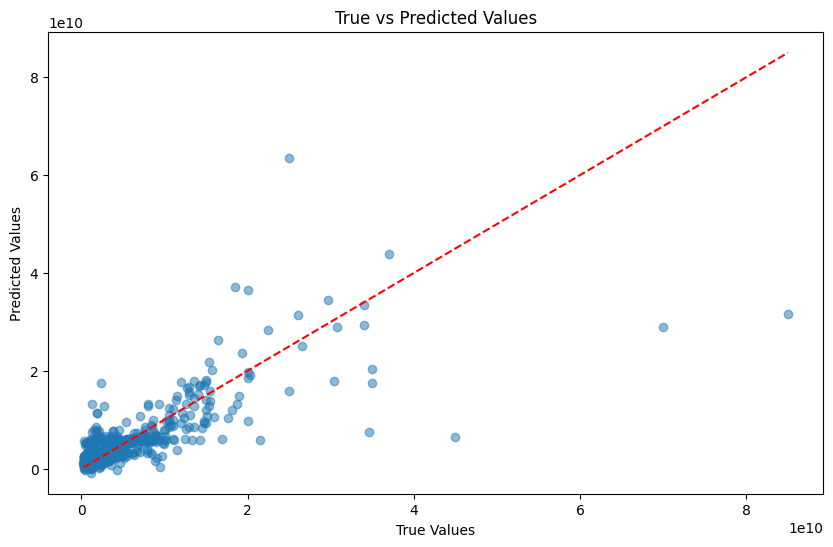

In [72]:
################# Step 9: Make predictions: #################

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Make predictions on the scaled test set
y_pred_scaled = model.predict(x_test_scaled)

# Reverse scaling for predicted values (convert back to original scale)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Reverse scaling for true values (y_test_scaled) to get back to original scale
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Compute the Mean Absolute Error (MAE) on the original scale
mae_original_scale = mean_absolute_error(y_test_original, y_pred)
print(f"MAE on original scale: {mae_original_scale}")

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MAE on normalized scale: 0.02322679347219588
MAE on original scale: 2146072119.560345


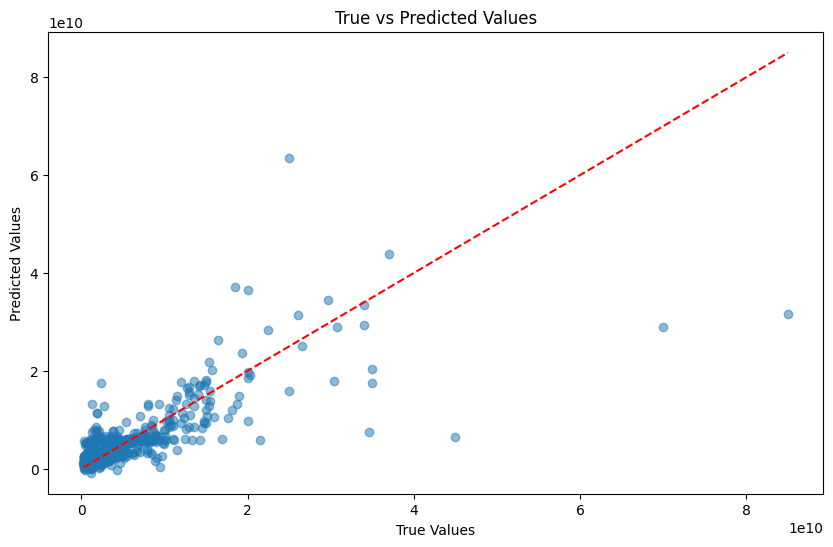

In [73]:
################# Step 9: Make predictions: #################

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Make predictions on the scaled test set
y_pred_scaled = model.predict(x_test_scaled)

# Reverse scaling for true values (y_test_scaled) to get back to original scale (for visualization)
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Reverse scaling for predicted values (for visualization)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Compute the MAE on the SCALED data (normalized error)
mae_normalized_scale = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f"MAE on normalized scale: {mae_normalized_scale}")

# Compute the Mean Absolute Error (MAE) on the original scale (for comparison)
mae_original_scale = mean_absolute_error(y_test_original, y_pred)
print(f"MAE on original scale: {mae_original_scale}")

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


MAE on original scale: 2146072119.560345
Normalized MAE (by mean of true values): 0.43593232137017146


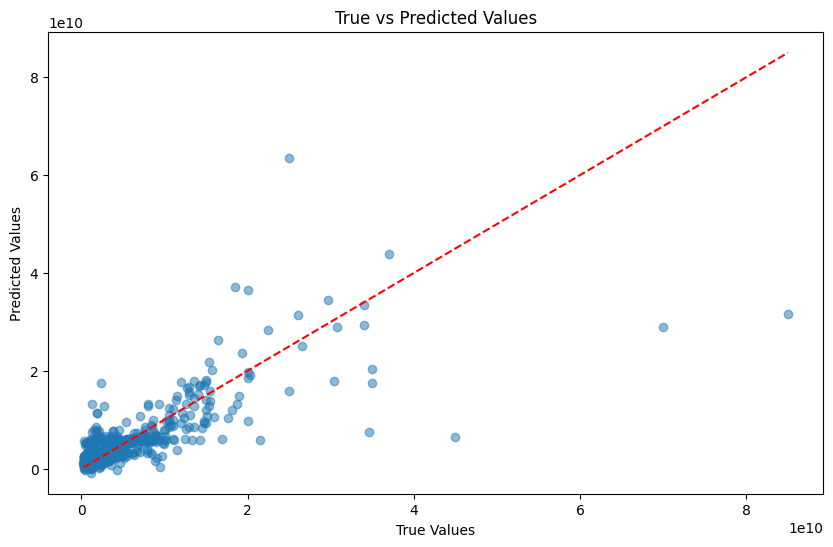

In [74]:
################# Step 9: Make predictions: #################

from sklearn.metrics import mean_absolute_error
import numpy as np # Import numpy for mean calculation

# y_test_original = y_scaler.inverse_transform(y_test_scaled)
# y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Compute the Mean Absolute Error (MAE) on the original scale
mae_original_scale = mean_absolute_error(y_test_original, y_pred)
print(f"MAE on original scale: {mae_original_scale}")

# Normalize the MAE by dividing by the mean of the actual values 
mean_y_test = np.mean(y_test_original)
nmae = mae_original_scale / mean_y_test
print(f"Normalized MAE (by mean of true values): {nmae}")


# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [76]:
################# Step 10: Evaluate the model performance: #################

test_loss, test_mae = model.evaluate(x_test_scaled, y_test_scaled, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - mae: 0.0232
Test Loss: 0.00242221774533391
Test MAE: 0.023226791992783546


In [ ]:
################# Step 10: Evaluate the model performance: #################
#### Interpretation of Regression Metrics:
## MSE: The lower the MSE, the better. It shows how much your model’s predictions deviate from the actual values.
## MAE: Like MSE, but less sensitive to outliers. It tells you how much, on average, your predictions differ from the true values.
## R-squared: A value between 0 and 1 that indicates how well your model fits the data. An R-squared value closer to 1 indicates a good fit.
#### Conclusion:
## If you're working with regression (like predicting prices), accuracy is not the correct metric. Instead, you should use MSE, MAE, or R².
## The code above should fix the issue by applying the correct loss function and metrics for a regression task.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the values on the test set
y_pred_scaled = model.predict(x_test_scaled)

# Invert scaling to get the actual values (since target variable was scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)  # Convert predictions back to the original scale
y_test_actual = y_scaler.inverse_transform(y_test_scaled)  # Convert actual test targets back to original scale

# Compute metrics for regression
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error (MSE): 2.067870259347835e+19
Mean Absolute Error (MAE): 2146072119.560345
R-squared (R²): 0.5732565122994793


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)


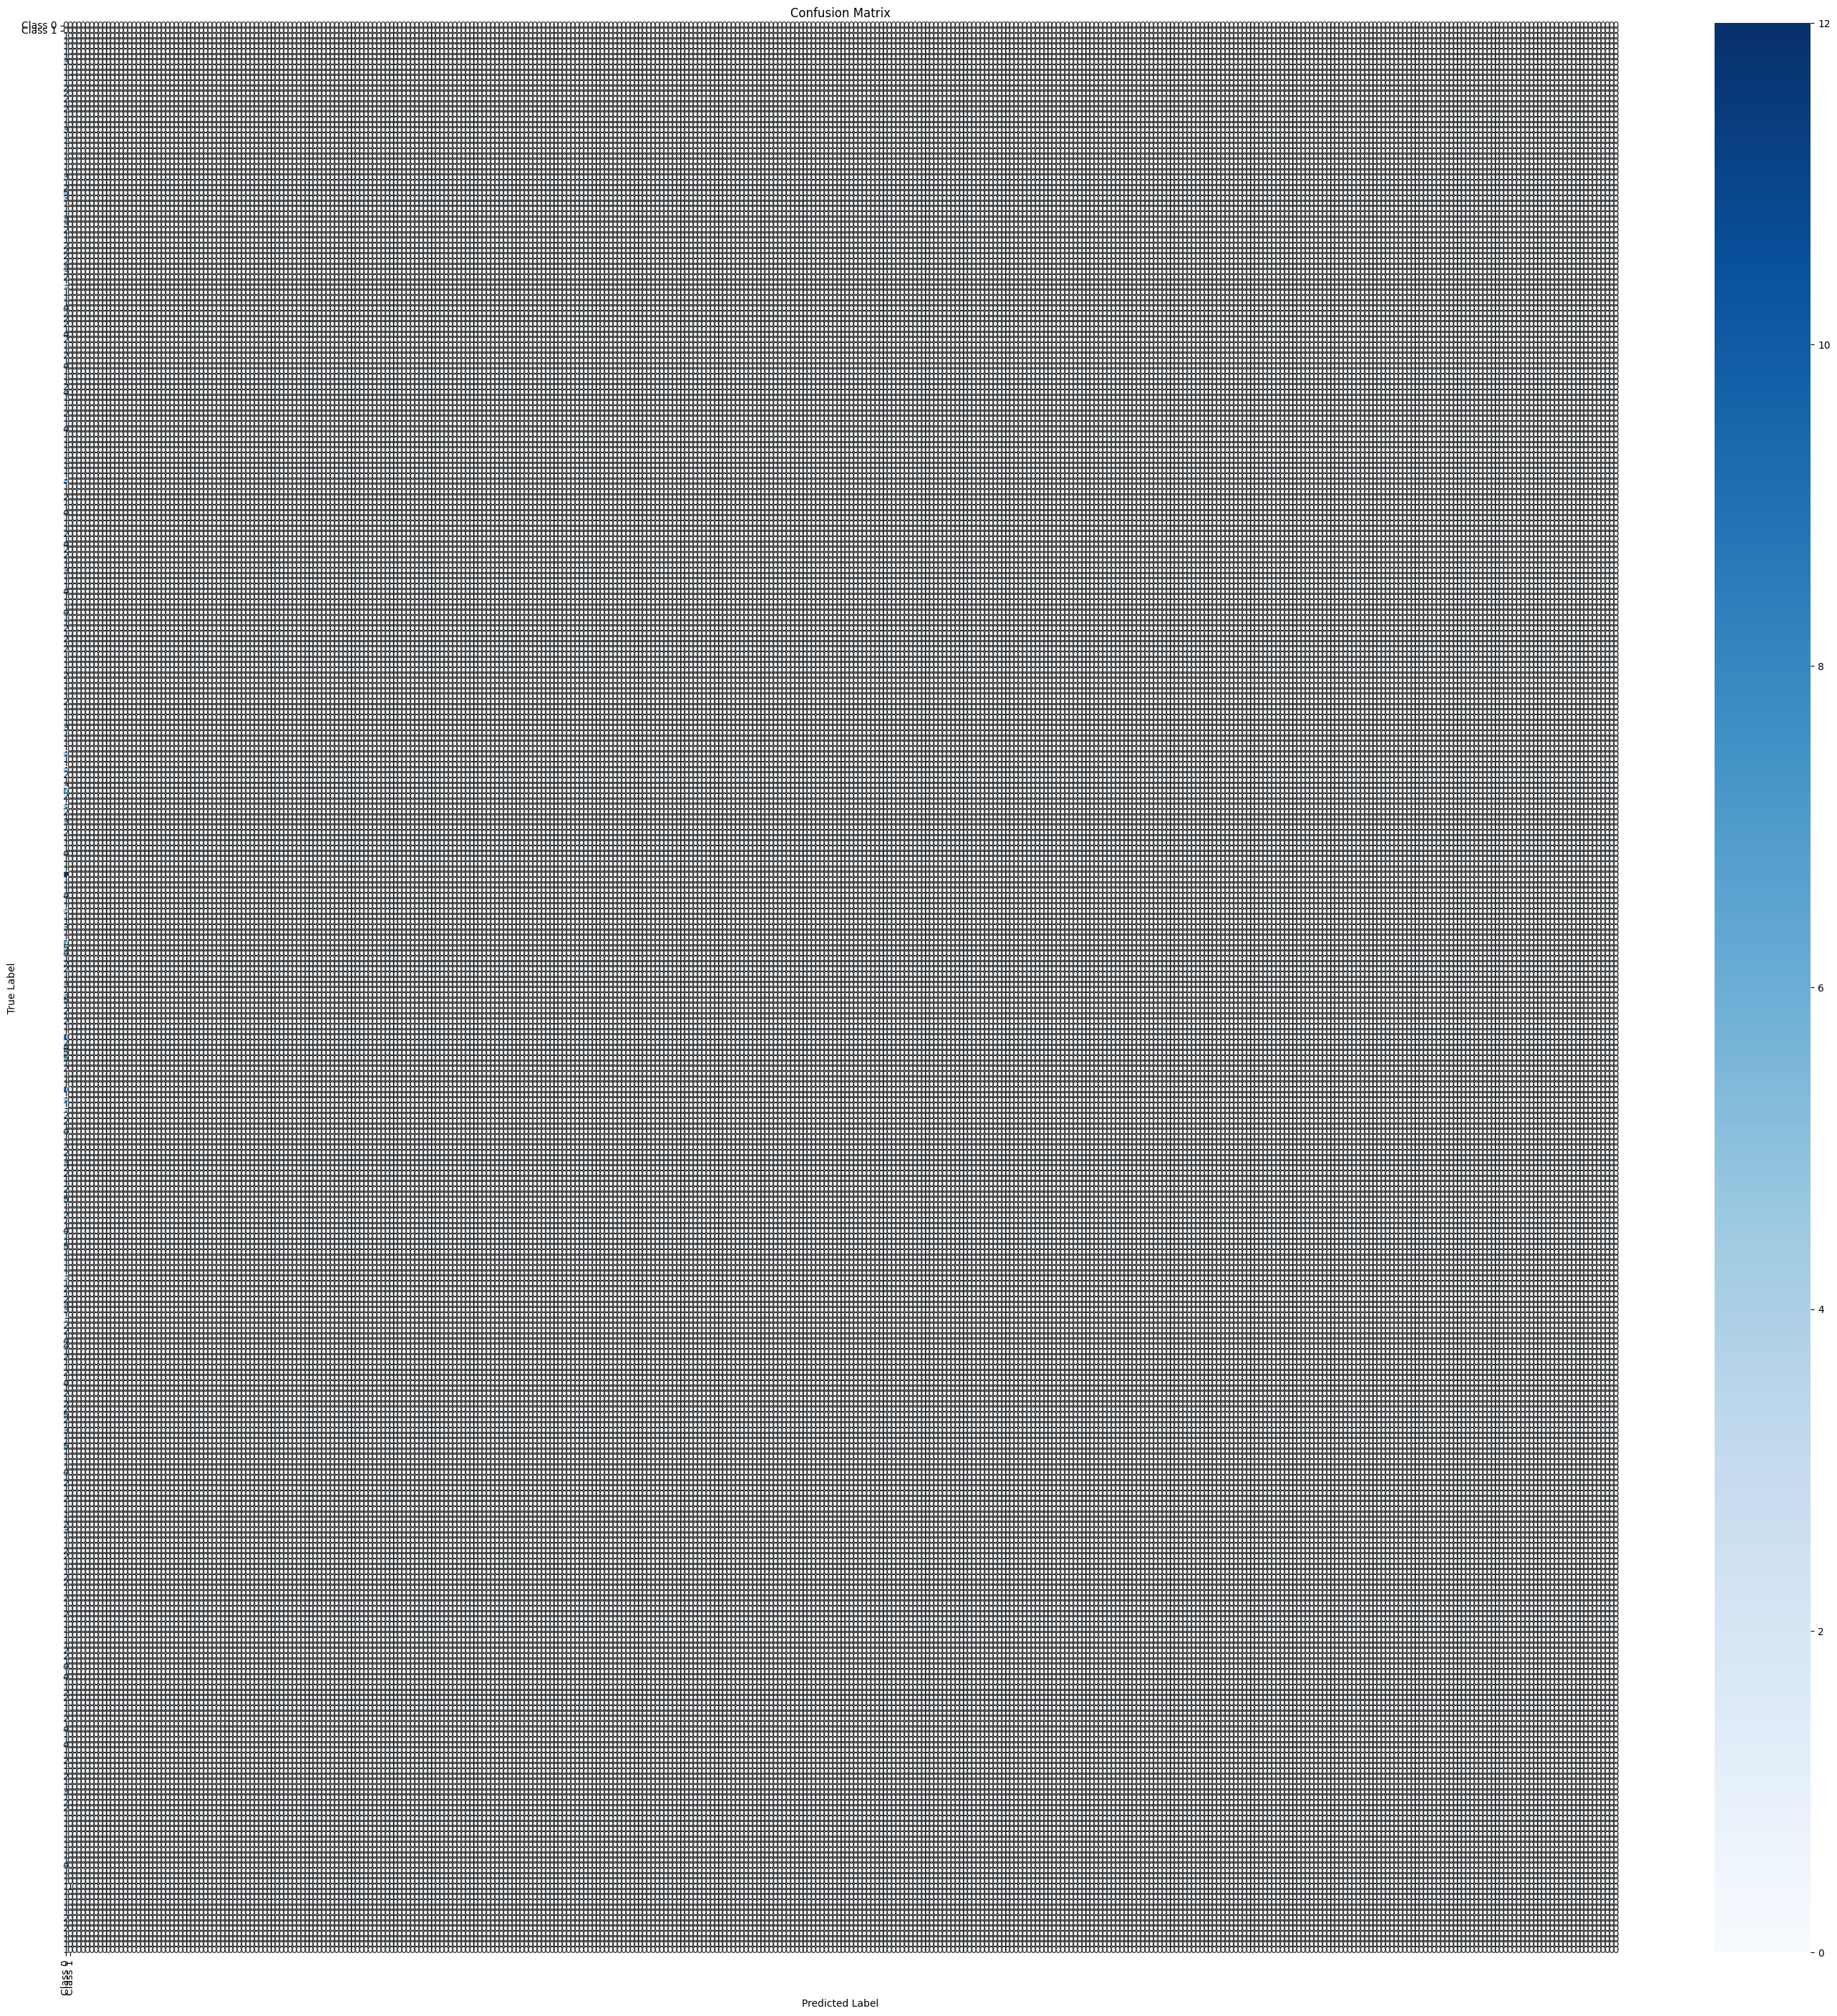

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [86]:
################# Step 10: Evaluate the model performance: #################

from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming your model is a classification model and you have predicted values
y_pred = model.predict(x_test_scaled)  # Model predictions

# Since y_pred is continuous for regression, you'd want to convert it to class labels for classification
# For example, using a threshold for binary classification or converting to classes for multi-class
y_pred_class = (y_pred > 0.5).astype(int)  # For binary classification (thresholding)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(35, 35))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


In [87]:
################# Step 10: Evaluate the model performance: #################

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the scaled test set
y_pred_scaled = model.predict(x_test_scaled)

# Reverse scaling for the predicted values to get them back to the original scale (for visualization purposes)
y_pred = y_scaler.inverse_transform(y_pred_scaled)  # Convert predicted values back to the original scale

# Reverse scaling for the true test values to get the actual values in the original scale (for visualization purposes)
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Compute the MAE, MSE, and R² on the original scale
mse = mean_squared_error(y_test_original, y_pred)  # Mean Squared Error on original scale
mae = mean_absolute_error(y_test_original, y_pred)  # Mean Absolute Error on original scale
r2 = r2_score(y_test_original, y_pred)  # R-squared on original scale

# Print evaluation metrics on the original scale
print(f"Mean Squared Error (MSE) on original scale: {mse}")
print(f"\nMean Absolute Error (MAE) on original scale: {mae}")
print(f"\nR-squared (R²) on original scale: {r2}")


# ------------------ Normalized Scale Metrics ------------------

# Compute MAE on the scaled (normalized) data
mae_normalized_scale = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f"\nMAE on normalized scale: {mae_normalized_scale}")

# Compute MSE on the scaled (normalized) data
mse_normalized_scale = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"\nMean Squared Error (MSE) on normalized scale: {mse_normalized_scale}")

# Compute R² on the scaled (normalized) data
# For R², it's not typical to compute on the normalized scale, but it can still give a sense of the fit
r2_normalized_scale = r2_score(y_test_scaled, y_pred_scaled)
print(f"\nR-squared (R²) on normalized scale: {r2_normalized_scale}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE) on original scale: 2.067870259347835e+19

Mean Absolute Error (MAE) on original scale: 2146072119.560345

R-squared (R²) on original scale: 0.5732565122994793

MAE on normalized scale: 0.02322679347219588

Mean Squared Error (MSE) on normalized scale: 0.002422217692232041

R-squared (R²) on normalized scale: 0.5732565265604093


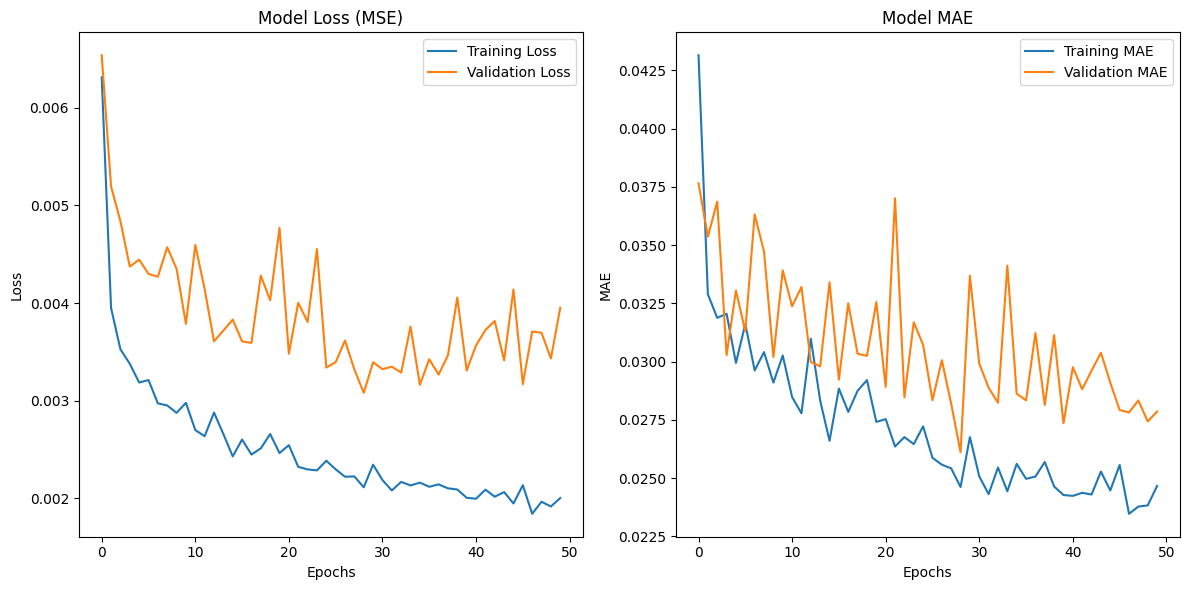

In [88]:
################# Step 10: Evaluate the model performance: #################

import matplotlib.pyplot as plt

# 1. Plot the training and validation loss (MSE) over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 2. Plot the training and validation MAE (Mean Absolute Error) over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
